<a href="https://colab.research.google.com/github/josuesoto16/DataAugmentation/blob/main/Data_Augmentation_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Argumentation
A common problem, is the amount of data available to enter the models, for models to present the expected results it is necessary for training to occur with a large amount of data (dataset), but in many cases the data needed to perform these tasks is not available.
This is where the **Data Augmentation** technique comes in that, as the name suggests, allows us to augment our dataset in two ways:




*   Introducing disturbances in the original data. For example: taking an original image centered, we replicate it off-center, reversing axes…
*   Using different distributions. Example: if we want to train a model to classify high-resolution images, we add low-resolution images, with noise… always maintaining the highest high-resolution ratio.



At first, neural networks are not intelligent. For example, a poorly trained neural network would think that these three tennis balls shown below are distinct and unique images.

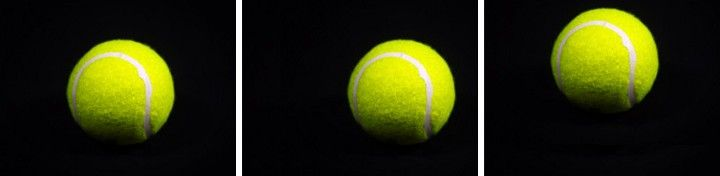



The same ball with some translations.



So if we work with images, it is only necessary to make some small alterations to our dataset and we can achieve our goal.
There are many ways to augment data with images, such as:


1.   Turn around (Flip)
2.   Rotation

1.   Scale
2.   Cutout

1.   Traslation
2.   Gaussian noise









The Keras library provides the ability to use data augmentation automatically when training a model.
This is accomplished by using the ImageDataGenerator class.
A variety of techniques are supported, as well as pixel scaling methods, such as:



*   The changes in the image (translations) through the arguments **width_shift_range** y **height_shift_range**.
*  Turning the image around using the arguments **horizontal_flip** y **vertical_flip**.
*   Image rotations through storyline **rotation_range**
*   Image brightness using the argument **brightness_range**.
*   Image zoom using the argument **zoom_range**.

Let's independently look at examples of images after they have been magnified. It is common to use a variety of augmentation techniques at the same time during training.


Supported image formats: jpeg, png, bmp, gif. Animated gifs are truncated to the first frame.

Arguments:

**directory**: Directory where the data is located. If labels is "inferred", it should contain subdirectories, each containing images for a class. Otherwise, the directory structure is ignored.

**labels**: Either "inferred" (labels are generated from the directory structure), or a list/tuple of integer labels of the same size as the number of image files found in the directory. Labels should be sorted according to the alphanumeric order of the image file paths (obtained via os.walk(directory) in Python).

**label_mode**: - 'int': means that the labels are encoded as integers (e.g. for sparse_categorical_crossentropy loss). - 'categorical' means that the labels are encoded as a categorical vector (e.g. for categorical_crossentropy loss). - 'binary' means that the labels (there can be only 2) are encoded as float32 scalars with values 0 or 1 (e.g. for binary_crossentropy). - None (no labels).

**class_names**: Only valid if "labels" is "inferred". This is the explict list of class names (must match names of subdirectories). Used to control the order of the classes (otherwise alphanumerical order is used).
color_mode: One of "grayscale", "rgb", "rgba". Default: "rgb". Whether the images will be converted to have 1, 3, or 4 channels.

**batch_size**: Size of the batches of data. Default: 32.
image_size: Size to resize images to after they are read from disk. Defaults to (256, 256). Since the pipeline processes batches of images that must all have the same size, this must be provided.

**shuffle**: Whether to shuffle the data. Default: True. If set to False, sorts the data in alphanumeric order.

**seed**: Optional random seed for shuffling and transformations.
validation_split: Optional float between 0 and 1, fraction of data to reserve for validation.

**subset**: One of "training" or "validation". Only used if validation_split is set.

**interpolation**: String, the interpolation method used when resizing images. Defaults to bilinear. Supports bilinear, nearest, bicubic, area, lanczos3, lanczos5, gaussian, mitchellcubic.

**follow_links**: Whether to visits subdirectories pointed to by symlinks. Defaults to False.

In [3]:
import matplotlib.pyplot as plt    #Library that allows graphing, very MATLAB style
import numpy as np                  #Library that allows working with arrangement  
from numpy import expand_dims       #Expand the array shape 
from keras.preprocessing.image import load_img    #From the Keras library for data augmentation, we load the image in the python image library (PIL) format
from keras.preprocessing.image import img_to_array #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from keras.preprocessing.image import ImageDataGenerator #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from PIL import Image #python image library
from urllib.request import urlopen #Read an email address

First we upload an image from the internet

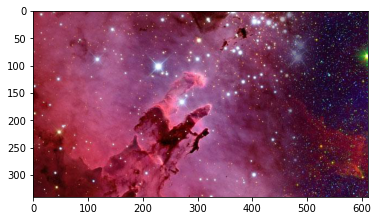

In [5]:
url = 'https://www.elcomercio.com/files/article_main/uploads/2018/03/15/5aaa7cc71332e.jpeg' 
filename = urlopen(url)
img = Image.open(filename)
plt.imshow(img)

Let's start with a makeover which means moving all the pixels in the image in one direction, such as horizontally or vertically, while keeping the same image dimensions.

The width_shift_range and height_shift_range arguments of the ImageDataGenerator constructor control the amount of horizontal and vertical scrolling respectively.


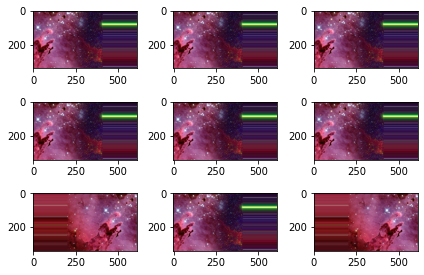

In [6]:
# We convert the image to an arrangement
data = img_to_array(img)
# We make an expansion to a sample
samples = expand_dims(data, 0)
# We create the data augmenter using only makeover
datagen = ImageDataGenerator(width_shift_range=[-200,200])
# We prepare the iterator
it = datagen.flow(samples, batch_size=1)
# We generate samples and display the results
for i in range(9):
	plt.subplot(330 + 1 + i)
	# Batches of images are generated
	batch = it.next()
	image = batch[0].astype('uint8') #It is converted to a valid value to be able to display it as an image 
	plt.imshow(image)
	plt.tight_layout()
plt.show()

An image flip means to reverse the rows or columns of pixels in the case of a vertical or horizontal flip, respectively.
Magnification is specified by a **horizontal_flip** or **vertical_flip** Boolean argument for the **ImageDataGenerator** class.

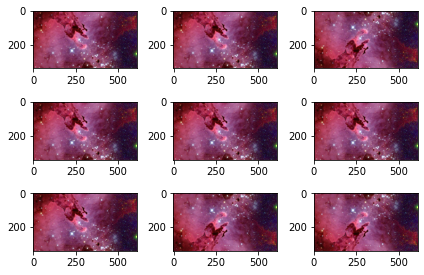

In [7]:
datagen = ImageDataGenerator(vertical_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The amount of zoom is sampled uniformly at random from the zoom region for each dimension (width, height) separately.

Floating or [lower limit, upper limit]. Range for random zoom. If it is a float, [lower bound, upper bound] = [1-zoom_range, 1 + zoom_range]

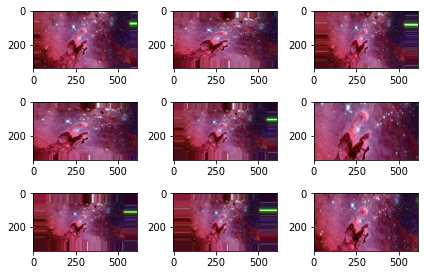

In [8]:
datagen = ImageDataGenerator(zoom_range=0.5) #float o Rango [lower,upper]
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The image is randomly rotated clockwise a specified number of degrees from 0 to 360. It is likely to rotate pixels outside of the image frame, leaving areas of the frame with no pixel data, which need to be filled.

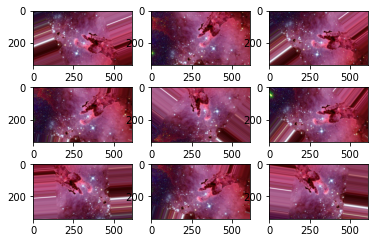

In [9]:
datagen = ImageDataGenerator(rotation_range=200)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

The combination of these techniques allows us to increase the amount of data in the dataset to be used, in many jobs a data augmentation is used to increase the amount of training images and improve the precision of the job.


            featurewise_center: Boolean, set the mean of each element to zero of all data.
            samplewise_center **: Boolean, set the mean of each sample to zero
            featurewise_std_normalization: Boolean, Divide the inputs by the standard deviation (std.) of the data set, based on the characteristics.
            samplewise_std_normalization: Boolean, divide each data by its std.
            zca_epsilon: The default is 1e-6.
            zca_whitening: Boolean, indicates if ZCA whitening is applied.

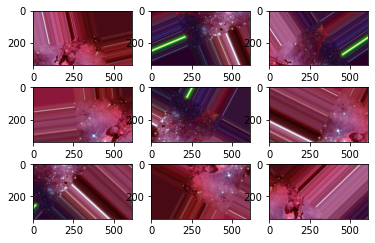

In [10]:
datagen = ImageDataGenerator(
            rotation_range               = 180,
            width_shift_range            = [150,150],   
            height_shift_range           = [200,200],   
            horizontal_flip              = True,   
            vertical_flip                = True)  
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

Now we consider words, the necessary work is not so simple given the inherent complexity of the language (we cannot replace each word by its synonym and even if we do, we run the risk that the meaning of the sentence changes completely. There are some libraries that we can help to carry out this task, we will begin by analyzing the following:


1.   Text Attack
2.   Google Trans

# TextAttack
It is a Python framework for adversary attacks, adversary training, and data augmentation in NLP. We will focus only on data augmentation.

In [24]:
!pip install textattack

     |████████████████████████████████| 327kB 2.6MB/s 
     |████████████████████████████████| 102kB 4.2MB/s 
     |████████████████████████████████| 61kB 4.3MB/s 
     |████████████████████████████████| 1.1MB 5.6MB/s 
     |████████████████████████████████| 317kB 9.0MB/s 
     |████████████████████████████████| 3.0MB 12.7MB/s 
     |████████████████████████████████| 686kB 30.8MB/s 
     |████████████████████████████████| 235kB 28.9MB/s 
     |████████████████████████████████| 153kB 35.7MB/s 
     |████████████████████████████████| 245kB 31.3MB/s 
     |████████████████████████████████| 1.7MB 37.3MB/s 
     |████████████████████████████████| 778kB 21.6MB/s 
     |████████████████████████████████| 61kB 5.1MB/s 
     |████████████████████████████████| 1.1MB 38.6MB/s 
     |████████████████████████████████| 890kB 40.9MB/s 
     |████████████████████████████████| 204kB 43.3MB/s 
     |████████████████████████████████| 17.3MB 236kB/s 
     |████████████████████████████████| 245kB 36.1MB/s 


In [37]:
from textattack.augmentation import WordNetAugmenter, EmbeddingAugmenter, EasyDataAugmenter, CharSwapAugmenter

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


2020-10-16 17:48:15 INFO: Downloading default packages for language: en (English)...
2020-10-16 17:49:53 INFO: Finished downloading models and saved to /root/stanza_resources.
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [38]:
text = "Will you take into account everything they tell you, those people inferior to you?"

TextAttack provides us with four methods for data augmentation.


## WordNetAugmenter
Augments the text by replacing it with synonyms from the WordNet thesaurus (thesaurus).

WordNet is a lexical database for English. Nouns, verbs, adjectives, and adverbs are grouped into sets of cognitive synonyms (synsets), each of which expresses a different concept.
WordNet superficially resembles a thesaurus in that it groups words based on their meaning.



In [39]:
aug = WordNetAugmenter();
aug.augment(text)

['Will you rent into account everything they tell you, those people inferior to you?']


## EmbeddingAugmenter
Augment text by transforming words with their inlays, with a constraint to ensure that their cosine similarity is at least 0.8.

In [40]:
aug = EmbeddingAugmenter();
aug.augment(text)

textattack: Downloading https://textattack.s3.amazonaws.com/word_embeddings/paragramcf.
100%|██████████| 481M/481M [00:07<00:00, 61.0MB/s]
textattack: Unzipping file /root/.cache/textattack/tmpmklqj7d0.zip to /root/.cache/textattack/word_embeddings/paragramcf.
textattack: Successfully saved word_embeddings/paragramcf to cache.


['Will you take into account all they tell you, those people inferior to you?']

## CharSwapAugmenter
Augment text by substituting, deleting, inserting, and swapping adjacent characters.

In [41]:
aug = CharSwapAugmenter()
aug.augment(text)

['Will you take into account everythin they tell you, those people inferior to you?']


## EasyDataAugmenter
This augments the text with a combination of Wordnet synonym replacement, word deletion, word order changes, and synonym insertions. All these 4 functionalities occur randomly. So we will get different results every time we run the code. This returns 4 augmented results, unlike the other methods.


In [42]:
aug = EasyDataAugmenter()
aug.augment(text)

['Will you take into calculate everything they tell you, those people inferior to you?',
 'Will you take into to everything they tell you, those people inferior account you?',
 'Will you take into account everything they tell you, those inferior to you?',
 'Will you take into account everything they tell separate you, those people inferior to you?']

Googletrans uses the Google Translate Ajax API for language detection and translation.

The key parameters for the **translate ()** method are:



1. **src** : source language. this parameter is optional as **googletrans** will detect it.
2. **dest** : target language. Mandatory parameter.

1. **text** : the text to be translated from the source language to the target language. Mandatory parameter.





 



When using this method what happens is a retranslation, we go from the original language to a target language and then we return to the original, during this backtranslation, there is a slight change in the sentence between the original text and the backtranslated text, but the general meaning of the sentence is still preserved.

Supported languages can be found at https://cloud.google.com/translate/docs/languages?hl=es

To obtain the best results, it is recommended to do some tests with the languages, if the target language is very similar, the translation does not lose information, however there may be the problem that the translation is too literal, this becomes a bit of a problem. try and failure.


Some examples of languages:


* Afrikaans 'af'

* Chinese (simplified) 'zh-CN or zh'

* Esperanto 'eo'

* Japanese 'ha'
* Latin 'la'


*   Spanish 'es'


* Turkmen 'tk'


* Yiddish 'yi'

* Zulu 'zu'



In [31]:
!pip install googletrans

In [32]:
from googletrans import Translator
translator = Translator()

In [45]:
origin_text = "If not successful, try again."
text_trans = translator.translate(text=origin_text, dest='es').text
final=translator.translate(text=text_trans, dest='la').text
print(origin_text)
print(text_trans)
print(final)

If not successful, try again.
Si no tiene éxito, vuelva a intentarlo.
Si parum rursum.


In [46]:
origin_text = "Try again."
text_trans = translator.translate(text=origin_text, dest='ja').text
final=translator.translate(text=text_trans, dest='zu').text
print(origin_text)
print(text_trans)
print(final)

Try again.
再試行。
Zama futhi.


In [48]:
origin_text = "Please try again, the data was not saved."
text_trans = translator.translate(text=origin_text, dest='eo').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

Please try again, the data was not saved.
Bonvolu reprovi, la datumoj ne estis konservitaj.
Please try again, the data has not been saved.
